Documentação da Análise Exploratória da base de dados de propriedades do Oleo 
Extraído de dados Publicos

In [1]:
from platform import python_version
print(python_version())

3.7.12


In [2]:
#!pip install pandas
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
#!pip install matplotlib
#!pip install sklearn

In [130]:
# Importação de bibliotecas 
#from sklearn.tree import DecisionTreeRegressor, export 
from sklearn.metrics import r2_score,max_error, mean_absolute_error 
#from sklearn.metrics import mean_squared_error 
#from sklearn.metrics import mean_absolute_percentage_error 
import matplotlib.pyplot as plt 
import os

In [158]:
# Criação de DATASET 
df = pd.read_csv('PB-DATASET-API.csv')
df['OilGrav'] = round((141.5/(df['API']+131.5)),3)
display(df)

,PB,RS,GG,API,TEMP,OilGrav
0,4509,1409,0.799,42.5,260,0.813
1,3516,950,0.980,31.7,230,0.867
2,3811,909,0.732,38.0,180,0.835
3,4750,1280,0.756,38.6,180,0.832
4,4026,1052,0.767,37.4,193,0.838
...,...,...,...,...,...,...
722,2692,393,0.631,38.6,179,0.832
723,3420,1212,0.685,42.3,194,0.814
724,3160,1213,0.705,45.4,186,0.800
725,3063,586,0.628,32.2,180,0.864


In [5]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PB      727 non-null    int64  
 1   RS      727 non-null    int64  
 2   GG      727 non-null    float64
 3   API     727 non-null    float64
 4   TEMP    727 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 28.5 KB
None


,PB,RS,GG,API,TEMP
count,727.000000,727.000000,727.000000,727.000000,727.000000
mean,2003.755158,633.861073,1.137160,34.927235,196.405777
std,1441.172613,506.565126,0.434983,8.500812,53.221577
min,79.000000,9.000000,0.521000,6.000000,74.000000
25%,815.000000,267.000000,0.815000,30.800000,160.000000
50%,1755.000000,514.000000,1.000000,37.400000,194.000000
75%,2900.500000,833.500000,1.316500,40.000000,238.000000
max,7142.000000,3299.000000,3.445000,56.800000,342.000000


In [ ]:
#!pip install  plotly

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

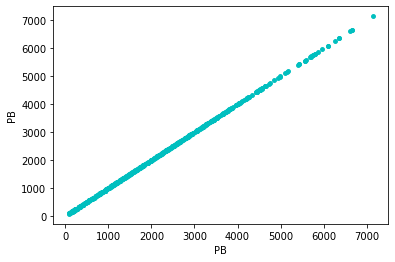

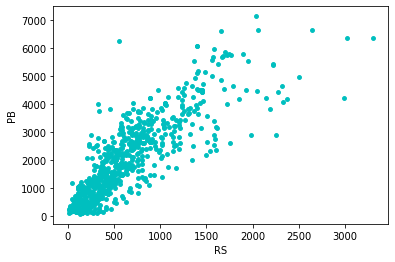

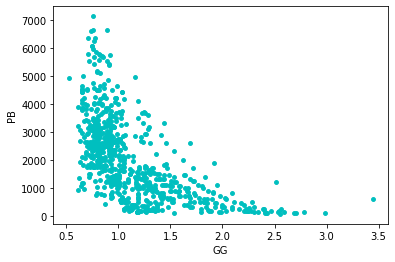

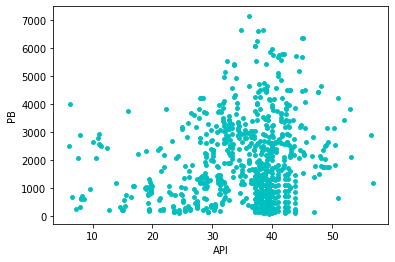

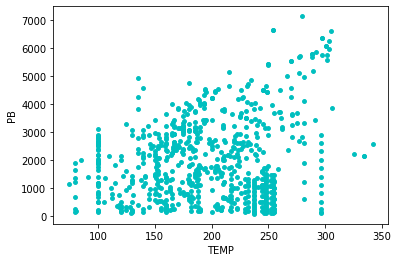

In [ ]:
import plotly.express as px

for coluna in df.columns:
    plt.scatter(df[coluna], df['PB'], color = 'c', marker = 'o', s = 15)
    plt.xlabel(coluna)
    plt.ylabel('PB')
    plt.show()

In [159]:
#!pip install seaborn
import seaborn as sns

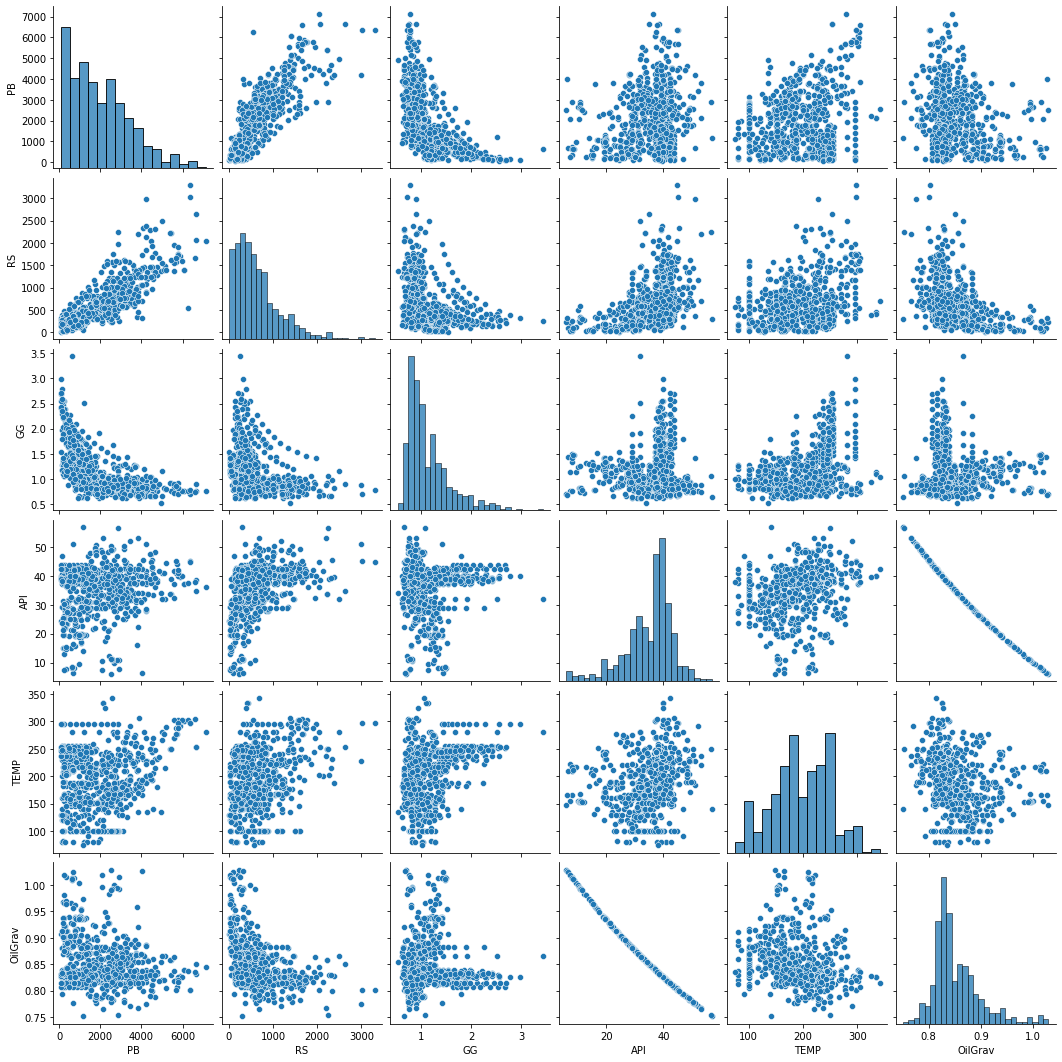

In [160]:
sns.pairplot(df, palette="GnBu_d")

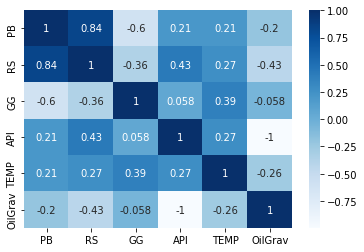

In [161]:
sns.heatmap(df.corr(), annot=True, cmap="Blues") #annot mostra os coeficientes da matriz

Podemos verificar a grande correlação da Razão de Gás Óleo (RS) com a Pressão de Bolha
Isto porque o RS também é um propriedade determinável pela Temperatura, dendidade específica do gás e do óleo, ou seja, RS = f(T, P, GasGrav, OilGrav).

O ideal seria criação de modelos preditivos de para todas as propriedades termodinâmicas e físico químicas e compará-las com as
correlações empíricas Standing, Vasquez-Beggs, Al-Marhoun, Petrosky-Farshad e etc...
No entando os procedimentos seriam semelhantes. 

Apesas da possibildiade de enfatizar a melhoria na preção por modelos criados por machine learning, este não será realizado.

No trabalho de conclusão de curso intitulado 

"MODELAGEM DE PROPRIEDADES FÍSICO QUÍMICAS E TERMODINÂMICAS DO ÓLEO E GÁS UTILIZANDO INTELIGÊNCIA ARTIFICIAL"

abordei a predição utilizando algumas ténicas presentes no ramo de machine learning para predição de Pb e Bo
e ainda comparei os resultados obtidos com os Softwares Python (Open Source) e Statistica®, produzido pela Tibco utilizando licença estudante e versão trial

In [162]:
import math
df['Standing'] = round(18.2*(((df['RS']/df['GG'])**0.83)*10**((0.00091*df['TEMP'])-0.0125*df['API'])-1.4),2)

g = pd.DataFrame(df).to_numpy()
VasquezBeggs = []
glaso = []
gamags = []
A = []
x = []
PetroskiFarshad = []

for item in range(len(g)):
  if g[item][3] > 30:
    c1, c2, c3 = 56.18, 0.84246, -10.393
  else:
    c1, c2, c3 = 27.624, 0.914328, -11.172
  
  gamags.append(g[item][2]*(1+0.00005912*g[item][3]*60*math.log(164.7/114.7,10)))
  VasquezBeggs.append(round((c1*(g[item][1]/gamags[item])*10**(c3*(g[item][3]/(g[item][4]+460))))**c2,2))

  A.append(math.log(((g[item][1]/g[item][2])**0.816)*g[item][4]**0.173/g[item][3]**0.989,10))
  glaso.append(round(10**(1.7669+1.7447*A[item]-0.30218*(A[item]**2)),2))

df['Vasquez-Beggs'] = VasquezBeggs
df['Glaso'] = glaso
df['Al-Marhoun'] = round(0.00538088*(df['RS']**0.715082)*(df['GG']**(-1.87784))*(df['OilGrav']**3.1437)*((df['TEMP']+460)**1.32657),2)
df['Petroski-Farshad'] = round(112.727*(df['RS']**0.577421)/((df['GG']**0.8439)*10**(0.0007916*df['API']**1.541-0.000045618*(df['TEMP']**1.3911)))-1391.051,2)


display(df)


,PB,RS,GG,API,TEMP,OilGrav,Standing,Vasquez-Beggs,Glaso,Al-Marhoun,Petroski-Farshad
0,4509,1409,0.799,42.5,260,0.813,4544.39,4824.92,4643.88,4713.98,4934.83
1,3516,950,0.980,31.7,230,0.867,3538.33,3813.25,3816.93,2803.68,3667.77
2,3811,909,0.732,38.0,180,0.835,3262.55,3572.98,3748.39,3778.29,3881.62
3,4750,1280,0.756,38.6,180,0.832,4154.58,4551.22,4637.32,4491.23,4785.97
4,4026,1052,0.767,37.4,193,0.838,3707.83,4054.27,4140.29,3990.80,4273.19
...,...,...,...,...,...,...,...,...,...,...,...
722,2692,393,0.631,38.6,179,0.832,1793.31,1956.14,2095.59,2704.92,2243.28
723,3420,1212,0.685,42.3,194,0.814,3988.22,4317.88,4472.26,4994.00,4728.26
724,3160,1213,0.705,45.4,186,0.800,3501.79,3761.80,4091.66,4410.19,4144.63
725,3063,586,0.628,32.2,180,0.864,3039.45,3380.48,3512.53,4097.69,3815.93


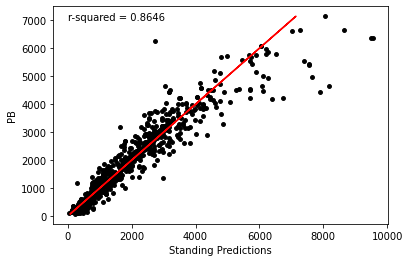

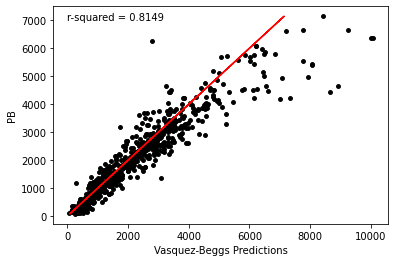

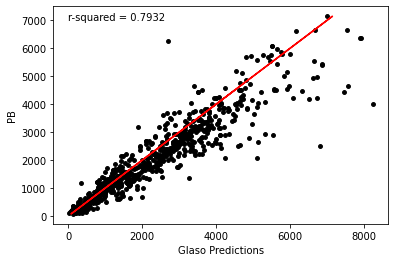

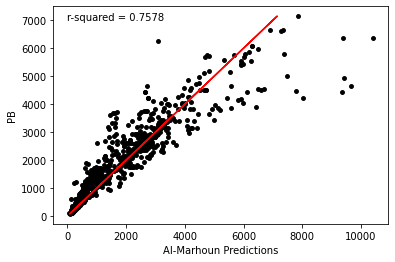

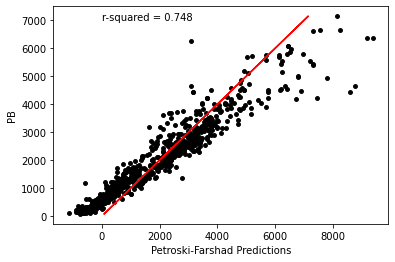

In [163]:
correlations = ['Standing', 'Vasquez-Beggs', 'Glaso', 'Al-Marhoun','Petroski-Farshad']

for coluna in correlations:
    plt.scatter(df[coluna], df['PB'], color = 'k', marker = 'o', s = 15)
    plt.xlabel(coluna + ' Predictions')
    plt.ylabel('PB')
    plt.plot(df['PB'], df['PB'], color = 'r')
    r2 = round(r2_score(df['PB'],df[coluna]),4)
    plt.annotate(f'r-squared = {r2}', (0,7000))
    plt.show()

Nas figura acima são demostradas o grau de dispersão dos valores predito pelas correlações empíricas em relação
aos valores verdadeiros de pressão de bolha determinados por métodos experimentais

Observa-se que as correlações apresentam grandes dispersões na determinição de valores altos de Pressão de Bolha, evidenciando as limitações das correlações empíricas hoje amplamente utilizadas. 

Por este e por outros motivos, a utilização do aprendizado de máquina (AM) surge como alternativa para geração de modelos que melhor se adaptam aos dados que se possuem. Nos modelos gerados por AM são métricas de eficiência do poder de predição e quanto ao poder de generalização. 

Modelos superajustados (overffiting) e sobreajustados (underfitting) não são desejáveis, com isso são variados parâmetros com o objetivo de se obter um modelo genalizado capaz de prover saídas confiáveis à dados não utilizados no treinamento do mesmo.




In [ ]:
"""
fig = plt.figure()

ax1= fig.add_subplot(1,2,1) 
ax1.plt.scatter(target_treinamento, Regressor.predict(previsores_treinamento), alpha=0.5)
ax1.plt.plot(target_teste,target_teste, color = 'red')
ax1.plt.title('Scatter Plot do Conjunto de Treinamento Pb ArvoreDecisao')
ax1.plt.xlabel('Pb Exp')
ax1.plt.ylabel('Pb Previsto')
ax1.plt.savefig('DT-SCATTERPLOT_TREINAMENTOFINAL.png', format='png')

ax2= fig.add_subplot(1,2,2)
ax2.plt.scatter(target_teste, Resultado, alpha=0.5)
ax2.plt.plot(target_teste,target_teste, color = 'red')
ax2.plt.title('Scatter Plot do Conjunto de Teste Pb ArvoreDecisao')
ax2.plt.xlabel('Pb Exp')
ax2.plt.ylabel('Pb Previsto')
ax2.plt.savefig('DT-SCATTERPLOT_TESTEFINAL.png', format='png')

plt.show()

"""